In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('weblog.csv')

In [63]:
df.head(5)

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [64]:
logs = df.drop(['Time','URL'],axis=1)
logs.head()

,IP,Status
0,10.128.2.1,200
1,10.128.2.1,302
2,10.128.2.1,200
3,10.131.2.1,200
4,10.130.2.1,200


In [65]:
logs['IP_number']=range(0,len(logs.IP.values))
logs

,IP,Status,IP_number
0,10.128.2.1,200,0
1,10.128.2.1,302,1
2,10.128.2.1,200,2
3,10.131.2.1,200,3
4,10.130.2.1,200,4
...,...,...,...
16002,10.130.2.1,200,16002
16003,10.130.2.1,200,16003
16004,10.130.2.1,200,16004
16005,10.130.2.1,200,16005


In [66]:
new_logs= logs.drop(['IP'],axis=1)
new_logs

,Status,IP_number
0,200,0
1,302,1
2,200,2
3,200,3
4,200,4
...,...,...
16002,200,16002
16003,200,16003
16004,200,16004
16005,200,16005


In [68]:
df1=pd.get_dummies(new_logs['Status'],drop_first=True)
df1.head()

,2017],2018],206,302,304,404,Aborted,Assertion,No,Segmentation,dumped,found
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df_new=pd.concat((df1,new_logs),axis=1)
df_new

,2017],2018],206,302,304,404,Aborted,Assertion,No,Segmentation,dumped,found,Status,IP_number
0,0,0,0,0,0,0,0,0,0,0,0,0,200,0
1,0,0,0,1,0,0,0,0,0,0,0,0,302,1
2,0,0,0,0,0,0,0,0,0,0,0,0,200,2
3,0,0,0,0,0,0,0,0,0,0,0,0,200,3
4,0,0,0,0,0,0,0,0,0,0,0,0,200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0,0,0,0,0,0,0,0,0,0,0,0,200,16002
16003,0,0,0,0,0,0,0,0,0,0,0,0,200,16003
16004,0,0,0,0,0,0,0,0,0,0,0,0,200,16004
16005,0,0,0,0,0,0,0,0,0,0,0,0,200,16005


In [72]:
IP_number= df_new['IP_number']
Status_404= df_new['404']
Status_2017= df_new['2017]']
Status_2018= df_new['2018]']
Status_206= df_new['206']
Status_302= df_new['302']
Status_304= df_new['304']
Aborted= df_new['Aborted']
Status_No= df_new['No']
Segmentation= df_new['Segmentation']
Dumped= df_new['dumped']
found= df_new['found']
Assertion= df_new['Assertion']

In [73]:
df_new.drop('Status',axis=1,inplace=True)
df_new

,2017],2018],206,302,304,404,Aborted,Assertion,No,Segmentation,dumped,found,IP_number
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0,0,0,0,0,0,0,0,0,0,0,0,16002
16003,0,0,0,0,0,0,0,0,0,0,0,0,16003
16004,0,0,0,0,0,0,0,0,0,0,0,0,16004
16005,0,0,0,0,0,0,0,0,0,0,0,0,16005


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(df_new)
data_scaled

array([[-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859, -1.73194261],
       [-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859, -1.73172619],
       [-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859, -1.73150978],
       ...,
       [-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859,  1.73150978],
       [-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859,  1.73172619],
       [-0.0209165 , -0.04186048, -0.05708911, ..., -0.01767656,
        -0.01117859,  1.73194261]])

In [113]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(data_scaled)
pred  = model.fit_predict(data_scaled)

In [114]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [115]:
dataset_scaled = pd.DataFrame(data_scaled, columns=['IP_number', 'Status_404','Status_2017','Status_2018','Status_206','Status_302','Status_304','Aborted','Status_No','Segmentation','Dumped','found','Assertion'])

In [116]:
dataset_scaled['cluster name'] = pred

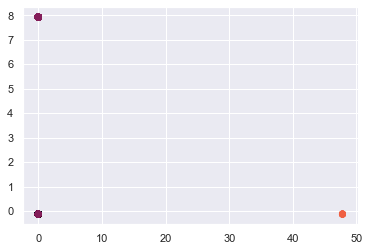

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.scatter(dataset_scaled['IP_number'], dataset_scaled['Status_302'], c=dataset_scaled['cluster name'],marker='o')

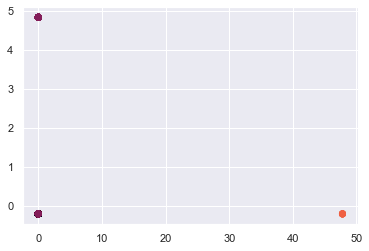

In [118]:
plt.scatter(dataset_scaled['IP_number'], dataset_scaled['Status_206'], c=dataset_scaled['cluster name'],marker='o')

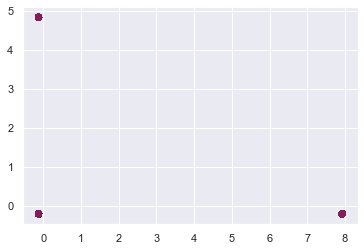

In [119]:
plt.scatter(dataset_scaled['Status_302'], dataset_scaled['Status_206'], c=dataset_scaled['cluster name'],marker='o')

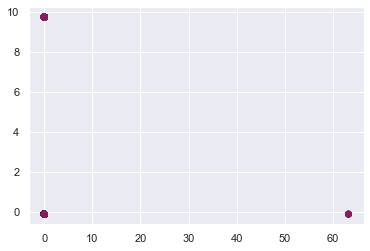

In [121]:
plt.scatter(dataset_scaled['Aborted'], dataset_scaled['Status_No'], c=dataset_scaled['cluster name'],marker='o')